In [2]:
import numpy as np
from impedance.models.circuits.fitting import rmse
from impedance.models.circuits.elements import circuit_elements, get_element_from_name
from impedance.models.circuits import CustomCircuit
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit

In [3]:
# Load data from a CSV with no headers, just make sure that you write Frequency|Zim|Zre in that order
from impedance import preprocessing
import csv
#Modify the name for your file at XXX.csv
data=np.genfromtxt('XXX.csv', delimiter=',')
frequencies = data[:, 0]
Z = data[:, 1] + 1j*data[:, 2]
#This takes out the negative values which are just artifacts from the measurement
def ignoreBelowX(frequencies, Z):
    
    frequencies = frequencies[np.imag(Z) < 0]
    Z = Z[np.imag(Z) < 0]
    return frequencies, Z
#This you can delete if you do not want to check the array of data
print (Z)
print (frequencies)

[  6.40956029  -0.51909018j   6.46606926  -0.61816749j
   6.57576442  -0.7009624j    6.66148577  -0.7950426j
   6.74707277  -0.89933264j   6.88192207  -0.99387873j
   6.98217307  -1.12529016j   7.10508484  -1.25829115j
   7.23384018  -1.4252824j    7.37657255  -1.6234911j
   7.51446571  -1.84354912j   7.68748025  -2.11961206j
   7.89371625  -2.45929151j   8.12035519  -2.83082959j
   8.37185429  -3.29075804j   8.68848042  -3.85722453j
   9.02123476  -4.44824142j   9.45102631  -5.22397901j
   9.96750832  -6.15336181j  10.50742859  -7.13408074j
  11.23772289  -8.37885584j  12.09214487  -9.82378299j
  13.06097968 -11.39483678j  14.31714623 -13.31293237j
  15.90158616 -15.63747964j  17.62506079 -18.02573255j
  19.77899069 -20.86370596j  22.47185727 -24.24927165j
  25.2831981  -27.7252249j   28.69922549 -31.95576194j
  32.66307255 -36.79148749j  37.79153199 -44.23934526j
  43.37521769 -51.5958327j   50.03196355 -60.71000509j
  57.9843923  -72.06901081j  67.72412902 -86.97684943j
  81.1469660

In [4]:
#KK linearity method
# Load data from the same file you want to analyze, this is just to check the validity of the data
#Modify the name for your file at XXX.csv
data=np.genfromtxt('XXX.csv', delimiter=',')
f = data[:, 0]
Z = data[:, 1] + 1j*data[:, 2]

# keep only the impedance data in the first quandrant
f, Z = preprocessing.ignoreBelowX(f, Z)
mask = f < 100000
f = f[mask]
Z = Z[mask]

In [5]:
from impedance.validation import linKK
M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, c=.5, max_M=100, fit_type='complex', add_cap=True)
print('\nCompleted Lin-KK Fit\nM = {:d}\nmu = {:.2f}'.format(M, mu))

10 0.7944797904811631 14.09489310059973

Completed Lin-KK Fit
M = 14
mu = 0.42


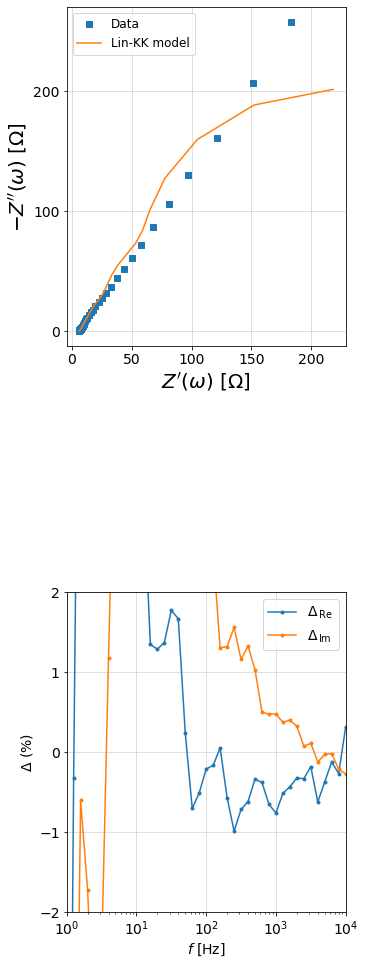

In [6]:
from impedance.visualization import plot_nyquist, plot_residuals
fig = plt.figure(figsize=(5,20))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

# plot original data
plot_nyquist(ax1, Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1, units='\Omega')
ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
plot_residuals(ax2, f, res_real, res_imag, y_limits=(-2,2))

plt.show()

In [7]:
#This could be a simple Randles circuit or any other arrangement that you think describes your system. You can check that 
circuit = 'R0-p(R1-CPE1,C1)'
initial_guess = [10, 1, 0.1,0.5, 0.1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)
circuit.fit(frequencies, Z)
print (circuit)


Circuit string: R0-p(R1-CPE1,C1)
Fit: True

Initial guesses:
     R0 = 1.00e+01 [Ohm]
     R1 = 1.00e+00 [Ohm]
  CPE1_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE1_1 = 5.00e-01 []
     C1 = 1.00e-01 [F]

Fit parameters:
     R0 = 9.99e+00  (+/- 2.67e+00) [Ohm]
     R1 = 5.38e+00  (+/- 1.88e+02) [Ohm]
  CPE1_0 = 1.12e-03  (+/- 1.74e-04) [Ohm^-1 sec^a]
  CPE1_1 = 5.59e-01  (+/- 8.14e-02) []
     C1 = 1.30e-04  (+/- 4.27e-04) [F]



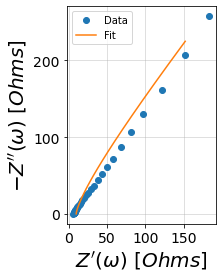

C:\Users\nicol\miniconda3\envs\impedance-analysis\lib\site-packages\impedance\visualization.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax_mag.plot(f, np.abs(Z), fmt, **kwargs)
C:\Users\nicol\miniconda3\envs\impedance-analysis\lib\site-packages\impedance\visualization.py:98: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  ax_mag.plot(f, np.abs(Z), fmt, **kwargs)
C:\Users\nicol\miniconda3\envs\impedance-analysis\lib\site-packages\impedance\visualization.py:99: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax_phs.plot(f, -np.angle(Z, deg=True), fmt, **kwargs)
C:\Users\nicol\miniconda3\envs\impedance-analysis\lib\site-pack

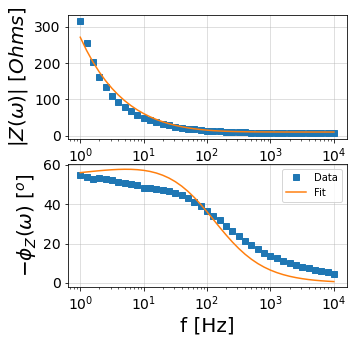

In [8]:
from impedance.visualization import plot_nyquist

Z_fit = circuit.predict(frequencies)
fig, ax = plt.subplots()
plot_nyquist(ax, Z, fmt='o')
plot_nyquist(ax, Z_fit, fmt='-')

plt.legend(['Data', 'Fit'])
plt.show()
circuit.plot(f_data=frequencies, Z_data=Z, kind='bode')
plt.legend(['Data', 'Fit'])
plt.show()

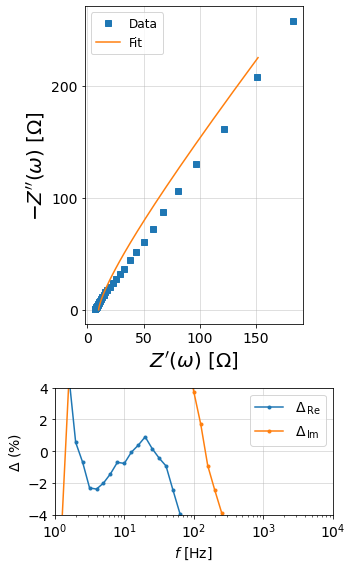

In [31]:
#Residuals of fit model
from impedance.visualization import plot_residuals

res_meas_real = (Z-circuit.predict(frequencies)).real/np.abs(Z)
res_meas_imag = (Z-circuit.predict(frequencies)).imag/np.abs(Z)
fig = plt.figure(figsize=(5,8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])
# plot original data
plot_nyquist(ax1, Z, fmt='s')
# plot measurement model
plot_nyquist(ax1, circuit.predict(frequencies), fmt='-', scale=1, units='\Omega')
ax1.legend(['Data', 'Fit'], loc=2, fontsize=12)
# Plot residuals
plot_residuals(ax2, frequencies, res_meas_real, res_meas_imag, y_limits=(-4,4))
plt.tight_layout()
plt.show()

In [ ]:
#This is for exporting the data results into the same folder you are
from numpy import savetxt
a=np.vstack((frequencies))
b=np.vstack((Z))
c=np.vstack((Z_fit))
d= circuit
e=np.vstack(Z_linKK)
f=np.vstack(res_real)
g=np.vstack(res_imag)
np.savetxt('fitdataXXX.csv',np.column_stack((a,c,e)), header='frequencies, Zrefit, Zimfit, Zrelinkk, Zimlinkk')
np.savetxt('resXXX.csv',np.column_stack((f,g)), header='Res_real,Res_imag')
np.savetxt('fitcircuitXXX.csv', [d], fmt='%s')